In [243]:
import numpy as np
from numpy import argmax, array
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint as sp_randint
from statsmodels.stats import weightstats as stests
import statsmodels.formula.api as sm
import statsmodels.api as sm
from pandas import plotting
from pprint import pprint
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE

In [14]:
sklearn.__version__


'0.22'

### 1. Data read

In [15]:
df = pd.read_csv('data-breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df.shape

(569, 33)

### 2. Feature selection

In [17]:
X = df.iloc[:, 1:]


In [18]:
X = X.drop(['diagnosis', 'id'], 1)


In [19]:
y = df['diagnosis']


In [20]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

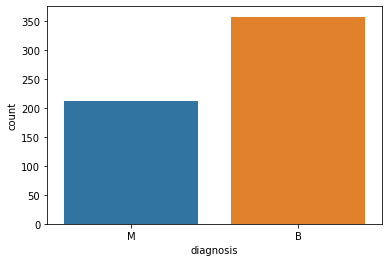

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [21]:
import seaborn as sns
sns.countplot(x='diagnosis', data=df)
plt.show()
df['diagnosis'].value_counts(normalize=True) * 100

In [22]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

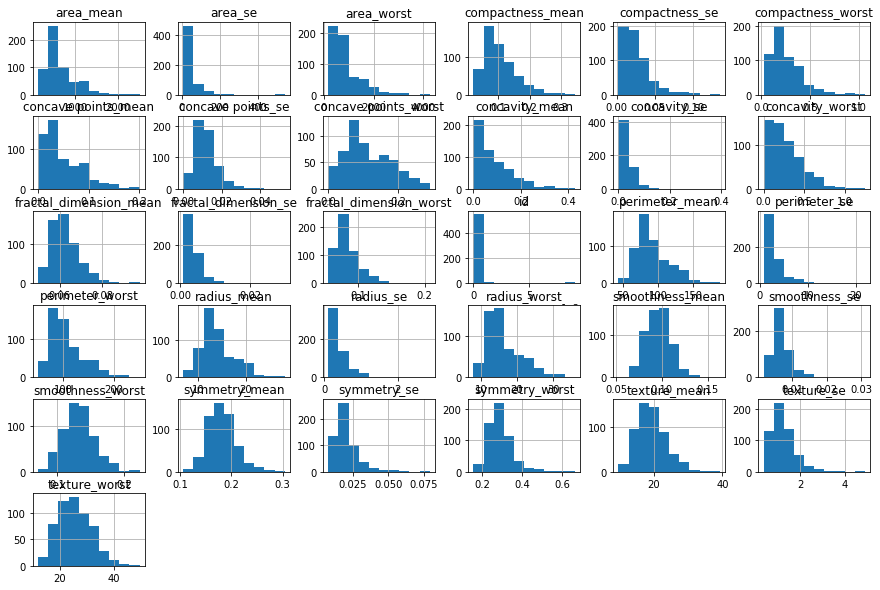

In [23]:
X.hist(figsize = (15,10));

In [15]:
#df.isna().sum()

In [23]:
X.nunique()[:10]

radius_mean               456
texture_mean              479
perimeter_mean            522
area_mean                 539
smoothness_mean           474
compactness_mean          537
concavity_mean            537
concave points_mean       542
symmetry_mean             432
fractal_dimension_mean    499
dtype: int64

In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### checking the correlated features


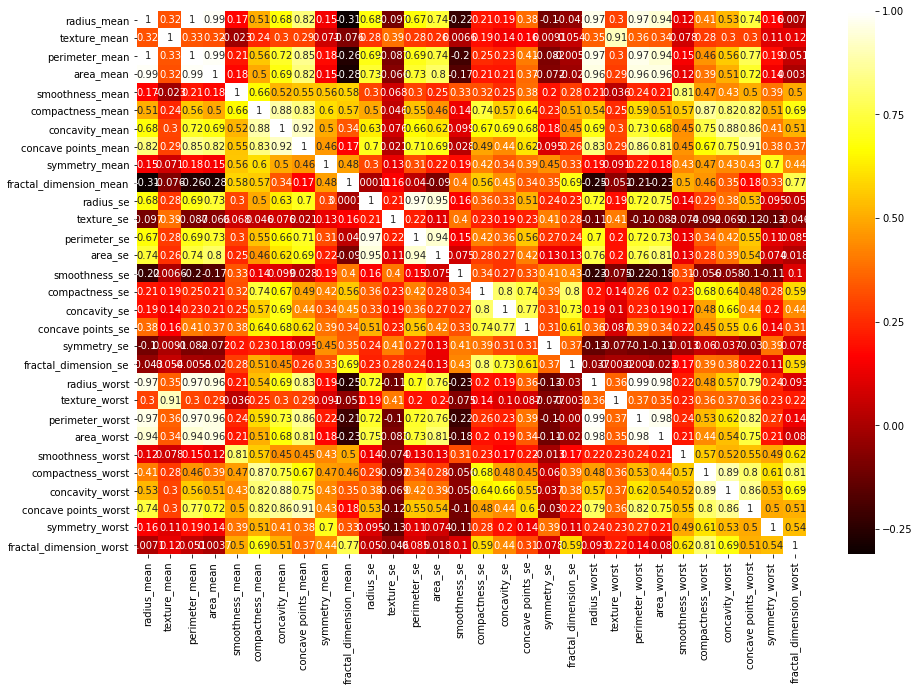

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()

#### drop the correlated features

In [191]:
#X.columns

In [24]:
X = X.drop(['perimeter_mean','radius_se','texture_worst','perimeter_se', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst','compactness_worst', 'concave points_mean','concave points_worst'], axis=1)

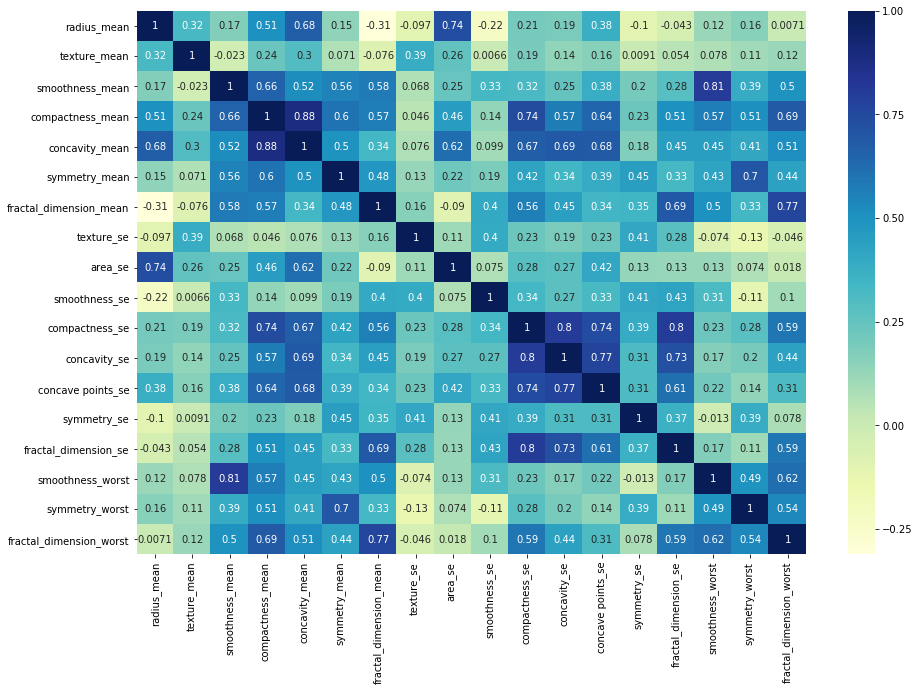

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

### Split the data, model selection

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [59]:
#Train with Decision Tree Classifier

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
score_dt = np.mean(
    cross_val_score(dtc,
                    X_train,
                    Y_train,
                    cv=4,
                    scoring='balanced_accuracy'))
score_dt

0.9113501112383922

In [60]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
print(f"Decision tree training set accuracy: {format(dtc.score(X_train, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(dtc.score(X_test, Y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9211 


In [49]:
clf = RandomForestClassifier(n_estimators=100)

In [62]:
#Train with Random Forest Classifier


pipeline = Pipeline(steps=[('classifier', clf)]) 
score_rf = np.mean(
    cross_val_score(pipeline,
                    X_train,
                    Y_train,
                    cv=4,
                    scoring='balanced_accuracy'))
score_rf

0.945876854194178

In [46]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [63]:
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [64]:
param_grid = { 
    'estimator__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'estimator__criterion' :['gini', 'entropy'],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf' : [1, 2, 4],
    'estimator__bootstrap': [True],
    'feat_select__n_features_to_select':[10,15,12,5]
}


In [221]:
#param_grid

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel


In [ ]:
#selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [546]:
# selector=RFE(clf)

In [177]:
estimator = LogisticRegression(random_state=0)
selector = RFE(estimator, step=1) #feature selection
pipeline_with_fs = Pipeline([('feat_select', selector), ('estimator', clf)])
random_search = RandomizedSearchCV(estimator = pipeline_with_fs, 
                                   param_distributions = param_grid, 
                                   n_iter = 100, cv = 3, verbose=2, 
                                   random_state=42, n_jobs = -1, 
                                   scoring = 'balanced_accuracy')

In [178]:
random_search.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              RFE(estimator=LogisticRegression(C=1.0,
                                                                               class_weight=None,
                                                                               dual=False,
                                                                               fit_intercept=True,
                                                                               intercept_scaling=1,
                                                                               l1_ratio=None,
                                                                               max_iter=100,
                                                                               multi_class='auto',
                                                                               n_jobs=

In [179]:
#best score
random_search.best_score_

0.9502631370686926

In [180]:
#best params
random_search.best_params_

{'feat_select__n_features_to_select': 15,
 'estimator__n_estimators': 600,
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 1,
 'estimator__max_features': 'log2',
 'estimator__max_depth': 10,
 'estimator__criterion': 'gini',
 'estimator__bootstrap': True}

In [181]:
best_est=random_search.best_estimator_.fit(X_train, Y_train)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [182]:
best_est.named_steps['estimator'].feature_importances_

array([0.245507  , 0.04395984, 0.01778042, 0.08312889, 0.2051531 ,
       0.01412207, 0.02393174, 0.01373418, 0.16722874, 0.0204983 ,
       0.03523288, 0.02615887, 0.03291107, 0.05087423, 0.01977868])

In [186]:
param_grid_fs= {
                 'estimator__n_estimators': [600],
                 'estimator__min_samples_split': [5],
                 'estimator__min_samples_leaf': [1],
                 'estimator__max_features': ['log2'],
                 'estimator__max_depth': [10],
                 'estimator__criterion': ['gini'],
                 'estimator__bootstrap': [True]}

In [187]:
cross_fs = GridSearchCV(pipeline_with_xg, param_grid=param_grid_fs, cv=5, scoring = 'roc_auc', n_jobs= -1)

cross_fs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000020091EC6F28>)),
                                       ('estimator',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
    

In [189]:
#best score
cross_fs.best_score_

0.9912928427419356

In [190]:
#best params
cross_fs.best_params_

{'estimator__bootstrap': True,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 10,
 'estimator__max_features': 'log2',
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 5,
 'estimator__n_estimators': 600}

In [200]:
best_est_fs=cross_fs.best_estimator_.fit(X_train, Y_train)

In [ ]:
predictions = best_est_fs.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test,predictions))



Accuracy: 92.98%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.91      0.88      0.89        56

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [147]:
# with RFE feature selection, Logisic reg and Randomized Search
estimator = clf
selector = RFE(estimator, step=1) #feature selection
pipeline_with_fs = Pipeline([('feat_select', selector), ('estimator', clf)])
random_search = RandomizedSearchCV(estimator = pipeline_with_fs, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'balanced_accuracy')

In [67]:
param_grid = { 
    'estimator__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'estimator__criterion' :['gini', 'entropy'],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf' : [1, 2, 4],
    'estimator__bootstrap': [True],
    'feat_select__n_features_to_select':[10,15,12,5]
}

In [68]:
param_grid2 = { 
    'estimator__n_estimators': [ 200, 2000, 10],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'feat_select__k':[10,15,12,5]
}

In [69]:
# adaboost Randomized Search
from sklearn.feature_selection import SelectKBest
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
selector = SelectKBest() #feature selection
pipeline_with_ada = Pipeline([('feat_select', selector), ('estimator', ada)])
random_search_ada = RandomizedSearchCV(estimator = pipeline_with_ada, 
                                   param_distributions = param_grid2, 
                                   n_iter = 100, cv = 5, 
                                   verbose=2, random_state=42, 
                                   n_jobs = -1, scoring = 'balanced_accuracy')


In [70]:
random_search_ada.fit(X_train, Y_train)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x0000020091EC6F28>)),
                                             ('estimator',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                       class_weight=None,
                                                                                                       criterion='gini',
                                                                                                       max_depth=1,
                                             

In [71]:
#best score
random_search_ada.best_score_

0.9563218390804599

In [72]:
#best params
random_search_ada.best_params_

{'feat_select__k': 15,
 'estimator__n_estimators': 2000,
 'estimator__learning_rate': 0.1}

In [73]:
param_grid_ada = { 
    'estimator__n_estimators': [2000],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'estimator__min_child_weight': [1,2],
    'estimator__learning_rate': [0.1],
    'feat_select__k':[15]
}

In [79]:
cross_ada = GridSearchCV(pipeline_with_xg, param_grid=param_grid_ada, cv=5, scoring = 'roc_auc', n_jobs= -1)

cross_ada.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000020091EC6F28>)),
                                       ('estimator',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
    

In [169]:
cross_ada.best_score_

0.9911180773249739

In [168]:
#best params
cross_ada.best_params_

{'estimator__learning_rate': 0.1,
 'estimator__min_child_weight': 1,
 'estimator__n_estimators': 2000,
 'feat_select__k': 15}

In [198]:
best_est=cross_ada.best_estimator_.fit(X_train, Y_train)

In [239]:
predictions = best_est.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test,predictions))



Accuracy: 92.98%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.92      0.86      0.89        56

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



In [167]:
param_grid3 = { 
    'estimator__n_estimators': [ 200, 2000, 10],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'estimator__min_child_weight': [1,2],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'feat_select__k':[10,15,12,5]
}

In [238]:
from xgboost import XGBClassifier
#xg = XGBClassifier(max_depth=7,
                       min_child_weight=1,
                       learning_rate=0.1,
                       n_estimators=500,
                       silent=True,
                       objective='binary:logistic',
                       gamma=0,
                       max_delta_step=0,
                       subsample=1,
                       colsample_bytree=1,
                       colsample_bylevel=1,
                       reg_alpha=0,
                       reg_lambda=0,
                       scale_pos_weight=1,
                       seed=1,
                       missing=None)

IndentationError: unexpected indent (<ipython-input-238-af8e3ab6205d>, line 3)

In [221]:
# xgboost Randomized Search
xg = XGBClassifier(random_state=5)                                                     
selector = SelectKBest() #feature selection
pipeline_with_xg = Pipeline([('feat_select', selector), ('estimator', xg)])
random_search_xg = RandomizedSearchCV(estimator = pipeline_with_xg, 
                                   param_distributions = param_grid3, 
                                   n_iter = 100, cv = 5, 
                                   verbose=2, random_state=42, 
                                   n_jobs = -1, scoring = 'balanced_accuracy')

In [222]:
random_search_xg.fit(X_train, Y_train)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   35.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x0000020091EC6F28>)),
                                             ('estimator',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
                                                            max_d

In [223]:
#best score
random_search_xg.best_score_

0.976765141540487

In [224]:
#best params
random_search_xg.best_params_

{'feat_select__k': 12,
 'estimator__n_estimators': 2000,
 'estimator__min_child_weight': 2,
 'estimator__learning_rate': 0.1}

In [226]:
best_est=random_search_xg.best_estimator_.fit(X_train, Y_train)

In [99]:
param_grid_xg = {'feat_select__k': [15],
                 'estimator__n_estimators': [200],
                 'estimator__min_child_weight': [1],
                 'estimator__learning_rate': [1]}

In [212]:
cross_xg = GridSearchCV(pipeline_with_xg, param_grid=param_grid_xg, cv=5, scoring = 'roc_auc', n_jobs= -1)

cross_xg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000020091EC6F28>)),
                                       ('estimator',
                                        XGBClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                            class_weight=None,
                                                                                            criterion='gini',
                                                                                            max_depth=5,
                                                                                            max_features=None,
                                                                                            max_leaf

In [213]:
#best score
cross_xg.best_score_

0.992760536674347

In [ ]:
#best params
cross_xg.best_params_

{'estimator__learning_rate': 1,
 'estimator__min_child_weight': 1,
 'estimator__n_estimators': 200,
 'feat_select__k': 15}

In [242]:
best_est=cross_xg.best_estimator_.fit(X_train, Y_train)

In [ ]:
predictions = best_est.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test,predictions))

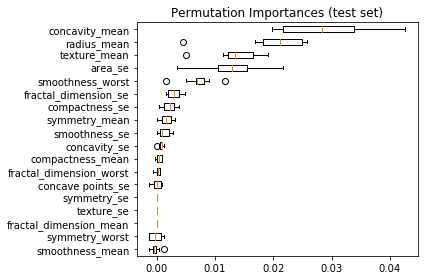

In [129]:
#permutation_importance
result = permutation_importance(cross_ada, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

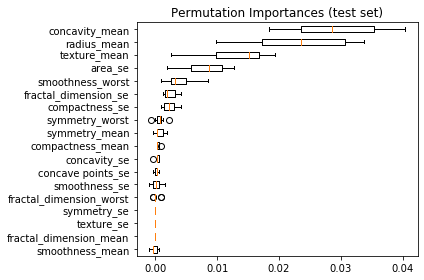

In [103]:
#permutation_importance
result = permutation_importance(cross_xg, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy = accuracy_score(Y_test, predict_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [111]:
best_est_ada.named_steps['estimator'].feature_importances_

array([0.26852062, 0.06046809, 0.03677344, 0.02798381, 0.31228375,
       0.00178001, 0.08765107, 0.01852028, 0.03342434, 0.02440591,
       0.01910377, 0.02544272, 0.03711094, 0.03489507, 0.01163605],
      dtype=float32)

In [158]:
best_est_xg=cross_xg.best_estimator_.fit(X_train, Y_train)

In [159]:
best_est_xg.named_steps['estimator'].feature_importances_

array([2.3730609e-01, 7.7439547e-02, 1.1292176e-01, 2.8600076e-03,
       3.3749056e-01, 5.9899692e-03, 8.9152887e-02, 1.6373677e-02,
       3.3430256e-02, 2.3547413e-05, 1.4117576e-02, 9.0153283e-03,
       1.7633209e-02, 3.6160156e-02, 1.0085425e-02], dtype=float32)

In [122]:
#prediction test
predict_ada = best_est_ada.predict(X_test)

In [163]:
print(classification_report(Y_test, predict_ada))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [164]:
predict_xg = best_est_xg.predict(X_test)

In [155]:
print(classification_report(Y_test,predict_xg))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



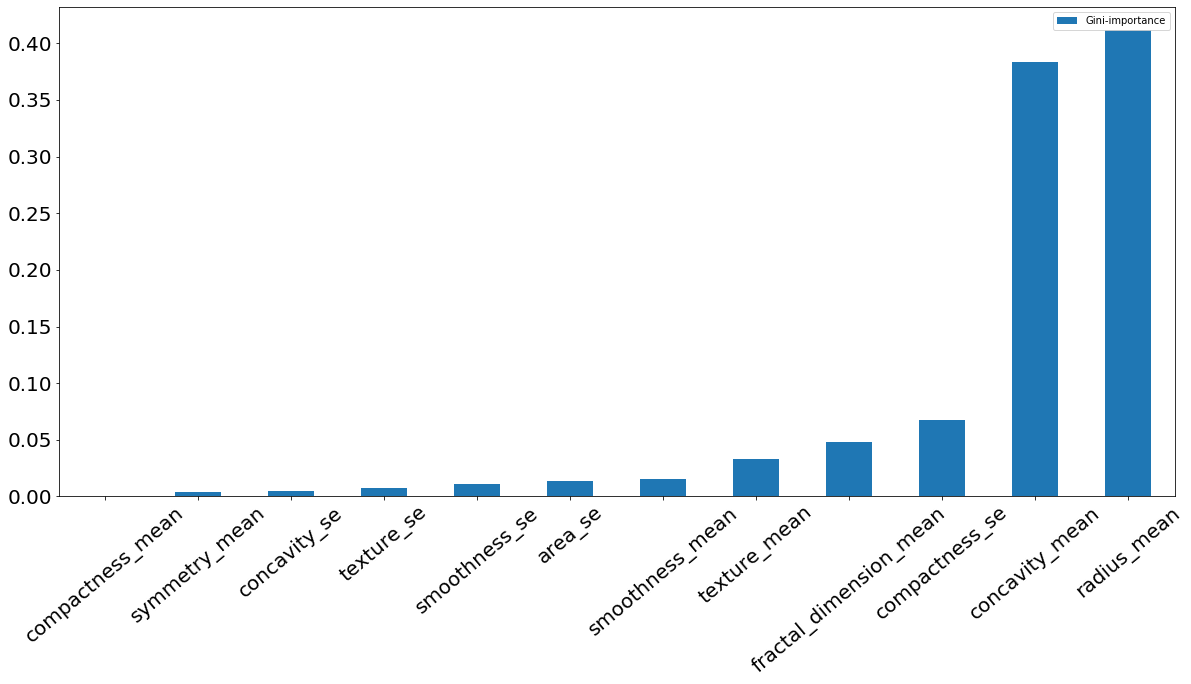

In [227]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_est.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

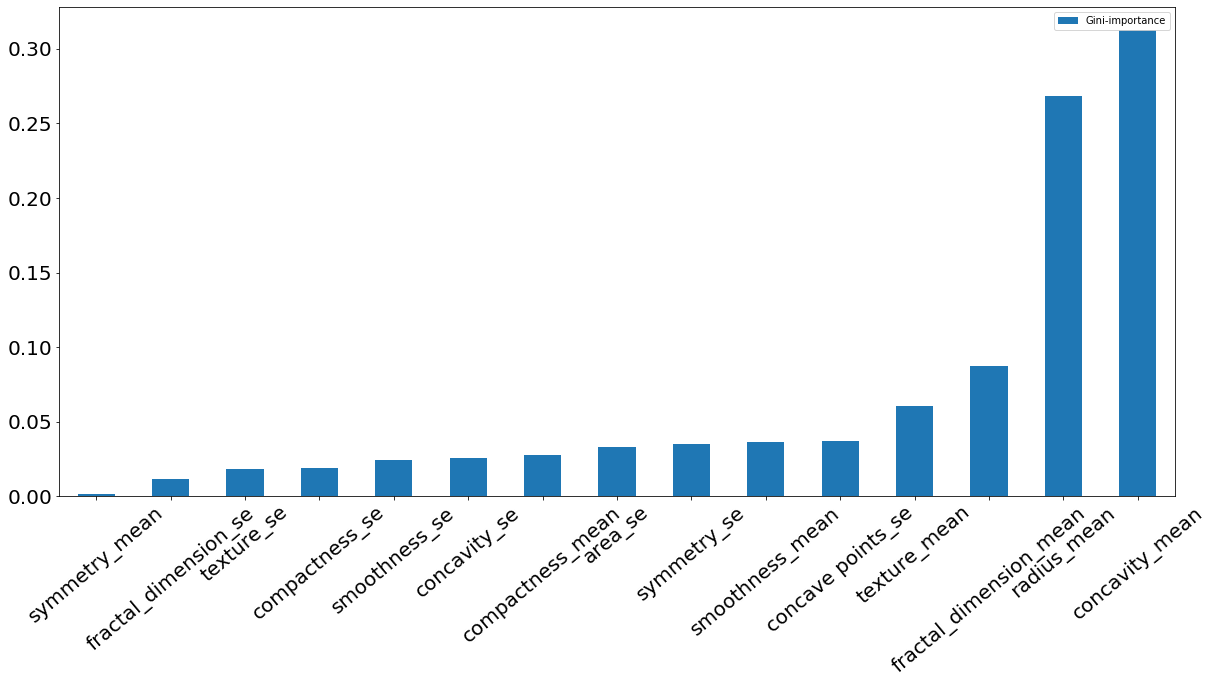

In [111]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_est_ada.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

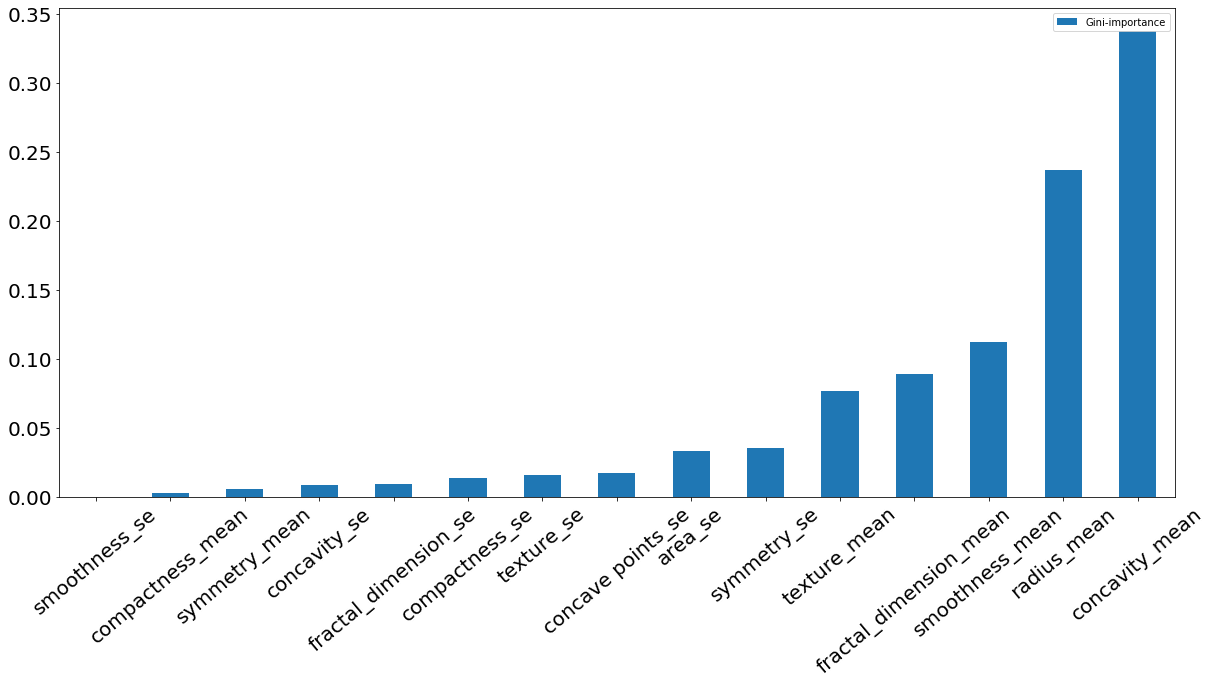

In [144]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_est_xg.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

In [231]:
feature_list = list(X.columns)
importances = list(best_est.named_steps['estimator'].feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: radius_mean     Importance: 0.4099999964237213
Variable: concavity_mean  Importance: 0.3799999952316284
Variable: compactness_se  Importance: 0.07000000029802322
Variable: fractal_dimension_mean Importance: 0.05000000074505806
Variable: texture_mean    Importance: 0.029999999329447746
Variable: smoothness_mean Importance: 0.019999999552965164
Variable: texture_se      Importance: 0.009999999776482582
Variable: area_se         Importance: 0.009999999776482582
Variable: smoothness_se   Importance: 0.009999999776482582
Variable: compactness_mean Importance: 0.0
Variable: symmetry_mean   Importance: 0.0
Variable: concavity_se    Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

In [232]:
print(best_est.named_steps['feat_select'].support_)
print(best_est.named_steps['feat_select'].ranking_)
print(np.where(best_est.named_steps['feat_select'].support_ == False)[0])

AttributeError: 'SelectKBest' object has no attribute 'support_'

In [233]:
X.drop(X.columns[np.where(best_est.named_steps['feat_select'].support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'SelectKBest' object has no attribute 'support_'

In [236]:
X.shape

(569, 18)

In [237]:
X_new = X

### RFECV check

In [583]:
# Running RFECV
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, Y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [592]:
#optimal number of features
rfecv.n_features_

17

In [593]:
rfecv.grid_scores_

array([0.87472527, 0.91208791, 0.92087912, 0.92967033, 0.93406593,
       0.93846154, 0.93626374, 0.94505495, 0.94725275, 0.95384615,
       0.95384615, 0.94945055, 0.95164835, 0.95824176, 0.95164835,
       0.94505495, 0.96263736, 0.95164835, 0.94945055, 0.95164835,
       0.95384615, 0.95604396, 0.95824176, 0.94725275, 0.96043956,
       0.94945055, 0.96043956, 0.95164835, 0.95604396, 0.95604396])

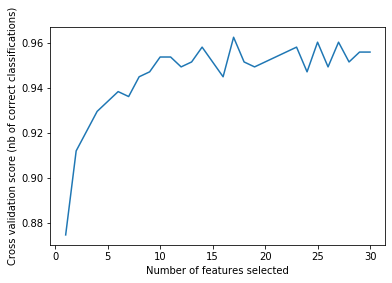

In [594]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [595]:
#10 features
rfecv.support_

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [602]:
print(np.where(rfecv.support_ == False)[0])

#X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 4  5  8  9 11 12 14 15 16 17 18 19 29]


In [603]:
rfecv.estimator_.feature_importances_

array([0.01064481, 0.01878791, 0.02751512, 0.03834597, 0.0374928 ,
       0.12955346, 0.00738685, 0.06091014, 0.11892193, 0.02499665,
       0.13605418, 0.11919884, 0.01661892, 0.02081711, 0.025352  ,
       0.19577545, 0.01162784])

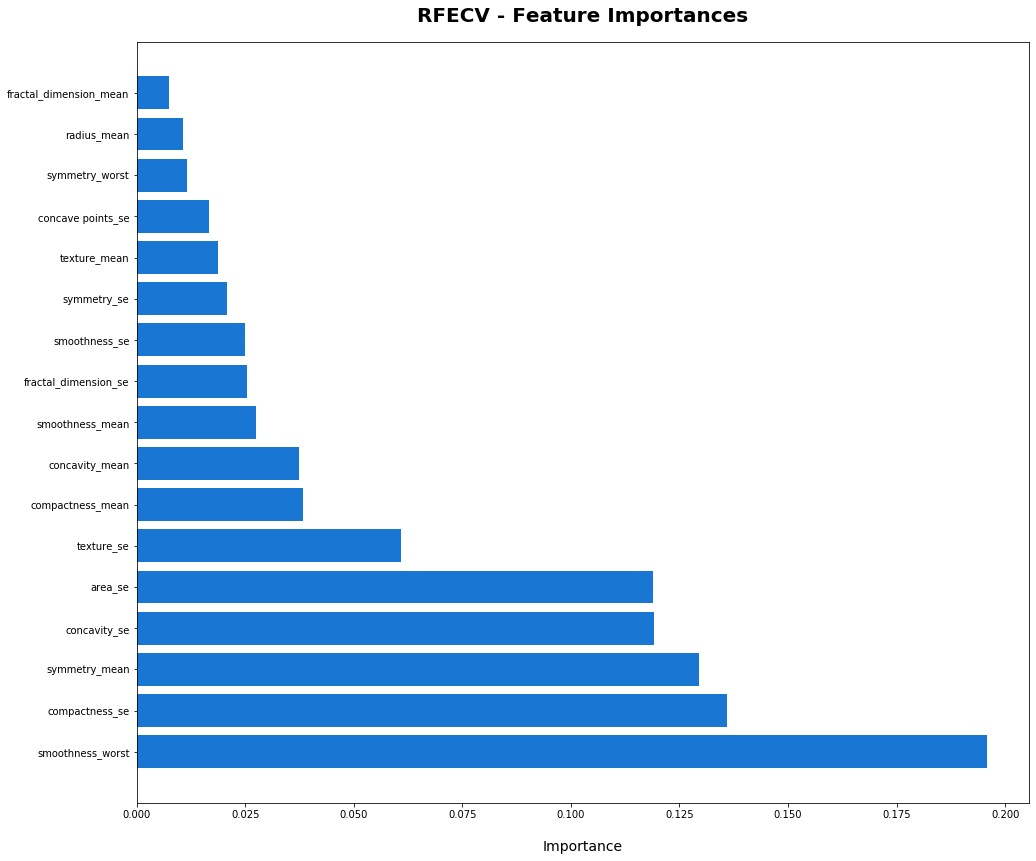

In [610]:
dset = pd.DataFrame()
dset['attr'] = X.columns[0:17]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [346]:
rfe = RFE(clf, 3, step=1)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False False False  True False False False
 False False False False False False]
[ 1  4 12  2  1 16 11 15  1 13 14  5  8 10  7  3  6  9]


### Predictions

In [139]:
#prediction test
predict = best_est.predict(X_test)

NameError: name 'best_est' is not defined

In [138]:
best_est.score(X_test,Y_test)

NameError: name 'best_est' is not defined

In [549]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict)
cm

NameError: name 'predict' is not defined

In [611]:
accuracy = accuracy_score(Y_test, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


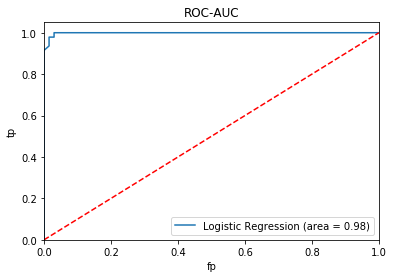

In [495]:
logit_roc_auc = roc_auc_score(Y_test, predict)
fpr, tpr, thresholds = roc_curve(Y_test, best_est.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('fp')
plt.ylabel('tp')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Grid Search

In [136]:
X1_train, X1_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

NameError: name 'X_new' is not defined

In [554]:
param_grid_new = {"estimator__n_estimators": [50,100,200,300],
              "estimator__max_depth": [3, 4,5,10,20],
              "estimator__max_features": ['sqrt'],
              "estimator__min_samples_split": [2, 3, 10],
              "estimator__min_samples_leaf": [1, 3, 10],
              "estimator__bootstrap": [True],
              "estimator__criterion": ["entropy"]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [241]:
 # grid search

grid_search = GridSearchCV(pipeline_with_fs, param_grid=param_grid_new, cv=cv, scoring = 'roc_auc', n_jobs= -1)


NameError: name 'param_grid_new' is not defined

In [556]:
grid_search.fit(X1_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        RFE(estimator=RandomForestClassifier(bootstrap=True,
                                                                             class_weight=None,
                                                                             criterion='gini',
                                                                             max_depth=None,
                                                                             max_features='auto',
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None

In [240]:
grid_search.best_score_

NameError: name 'grid_search' is not defined

In [559]:
grid_search.best_params_

{'estimator__bootstrap': True,
 'estimator__criterion': 'entropy',
 'estimator__max_depth': 10,
 'estimator__max_features': 'sqrt',
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 100}

In [133]:
best_best_est=grid_search.best_estimator_.fit(X1_train, y_train)

NameError: name 'grid_search' is not defined

In [561]:
#best score
best_best_est.named_steps['estimator'].feature_importances_


array([0.04578114, 0.06498819, 0.13456803, 0.15273024, 0.20277767,
       0.1458558 , 0.25329892])

In [562]:
print(best_best_est.named_steps['feat_select'].support_)
print(best_best_est.named_steps['feat_select'].ranking_)
print(np.where(best_best_est.named_steps['feat_select'].support_ == False)[0])

[False False  True  True  True False  True False  True  True False False
 False  True False]
[5 4 1 1 1 3 1 7 1 1 9 6 2 1 8]
[ 0  1  5  7 10 11 12 14]


In [132]:
best_best_est.named_steps['estimator'].n_features_


NameError: name 'best_best_est' is not defined

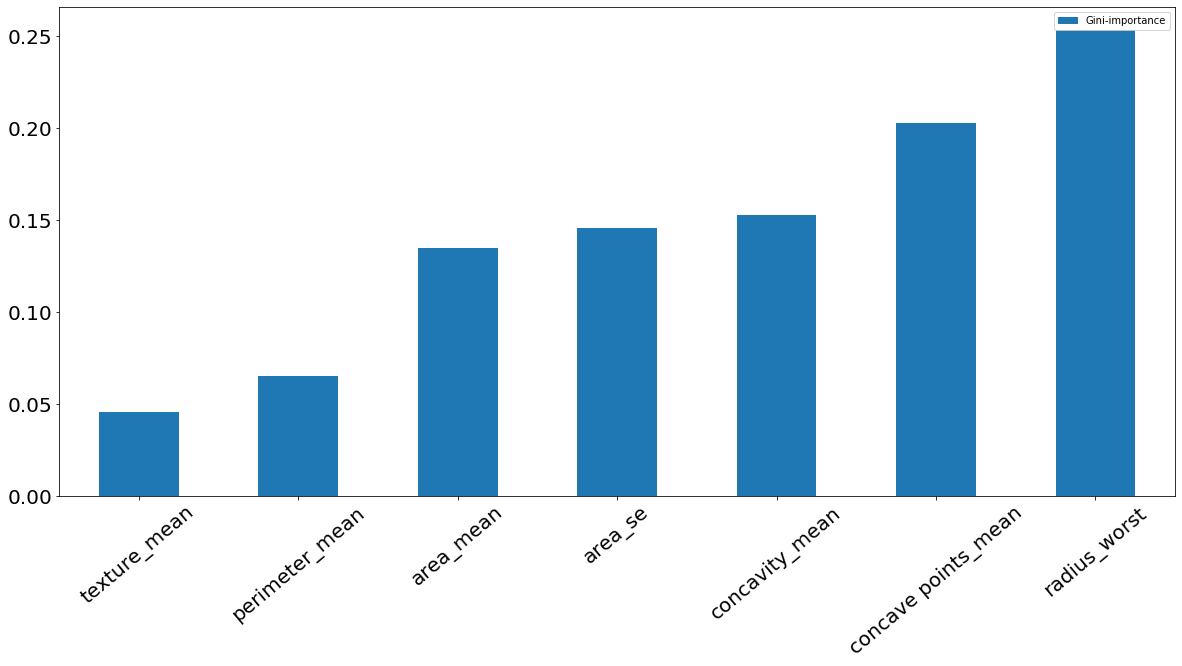

In [564]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_best_est.named_steps['estimator'].feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',fontsize=20, rot=40, figsize=(20, 9))

### Predictions

In [131]:
#prediction test
predict2 = best_best_est.predict(X1_test)

NameError: name 'best_best_est' is not defined

In [566]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [130]:
accuracy = accuracy_score(y_test, predict2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


NameError: name 'predict2' is not defined

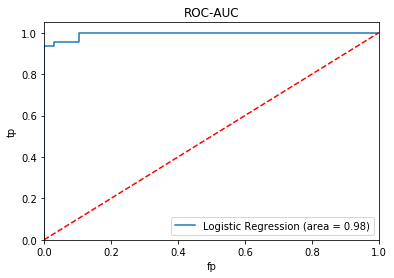

In [568]:
logit_roc_auc = roc_auc_score(Y_test, predict)
fpr, tpr, thresholds = roc_curve(y_test, best_best_est.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('fp')
plt.ylabel('tp')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [87]:
from sklearn.inspection import permutation_importance

In [176]:
#Bayesian optimization
from bayes_opt import BayesianOptimization

def bayesian_optimization(X_train, Y_train, X_test, Y_test, function, parameters):
    
    n_iterations = 10
    gp_params = {"alpha": 1e-4}

    BO = BayesianOptimization(function, pbounds=parameters,random_state=1)
    BO.maximize(n_iter=n_iterations, **gp_params)

    return BO.max

In [28]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
            RandomForestClassifier(
                n_estimators=int(max(n_estimators, 0)),
                max_depth=int(max(max_depth, 1)),
                min_samples_split=int(max(min_samples_split, 2)),
                n_jobs=-1,
                random_state=42,
                class_weight="balanced"),
            X=X_train,
            y=y_train,
            cv=cv_splits,
            scoring="accuracy",
            n_jobs=-1).mean()

    parameters = {
        "n_estimators": (50, 400),
        "max_depth": (4, 20),
        "min_samples_split": (2, 10)
    }

    return function, parameters

In [29]:
 rfc_optimization(5)
    

(<function __main__.rfc_optimization.<locals>.function(n_estimators, max_depth, min_samples_split)>,
 {'n_estimators': (50, 400),
  'max_depth': (4, 20),
  'min_samples_split': (2, 10)})

In [172]:
#Train model
def train(X_train, Y_train, X_test, Y_test, function, parameters):    
    best_solution = bayesian_optimization(X_train, Y_train, X_test, Y_test, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, Y_train)
    
    return model, params

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
function, parameters = rfc_optimization(5)

In [175]:
 train(X_train, Y_train, X_test, Y_test, function, parameters)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.5705   |  10.67    |  7.763    |  50.04    |
|  2        |  0.5905   |  8.837    |  3.174    |  82.32    |
|  3        |  0.5753   |  6.98     |  4.764    |  188.9    |
|  4        |  0.5954   |  12.62    |  5.354    |  289.8    |
|  5        |  0.5652   |  7.271    |  9.025    |  59.59    |
|  6        |  0.603    |  18.35    |  2.574    |  400.0    |
|  7        |  0.5378   |  5.318    |  10.0     |  400.0    |
|  8        |  0.5854   |  19.9     |  2.061    |  156.2    |
|  9        |  0.5979   |  19.85    |  2.022    |  326.0    |
|  10       |  0.6005   |  19.95    |  2.088    |  277.8    |
|  11       |  0.5755   |  19.62    |  2.075    |  50.43    |
|  12       |  0.5979   |  19.88    |  2.02     |  267.5    |
|  13       |  0.6004   |  19.96    |  2.03     |  291.0    |
|  14       |  0.6029   |  19.99    |  9.802    |  223.1    |
|  15   

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=18, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=399,
                        n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 {'max_depth': 18.352859169661095,
  'min_samples_split': 2.573547054429201,
  'n_estimators': 399.96284612870096})